# Main analysis

No handles with labels found to put in legend.


Cholesky dict
[2, 6, 28, 192]

sqrt list
[2, 6, 28, 192]


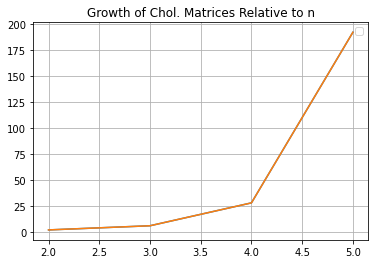

In [2]:
# imports
import main
import matplotlib.pyplot as plt
import numpy as np

run_from = 2
up_to = 6

n_list = []         # parallel list of n 
chol_len_list = []
sqrt_len_list = []

for dim in range(run_from, up_to):
    general_upper_matrix = main.generate_upper_triangular_matrix_of_nxn(dim)
    upper_triangular_list = main.find_matrix_list_from_gen(2, general_upper_matrix)
    sqrt_list = main.generate_square_root_matrices(2, upper_triangular_list)
    chol_list = main.generate_cholesky_roots_matrices(2, upper_triangular_list)

    n_list.append(dim)
    sqrt_len_list.append(len(sqrt_list))
    chol_len_list.append(len(chol_list))

print("Cholesky dict")
print(chol_len_list)
print()
print("sqrt list")
print(sqrt_len_list)

plt.figure()
plt.title("Growth of Chol. Matrices Relative to n")

plt.plot(n_list, chol_len_list, label="Chol frequency")
plt.plot(n_list, sqrt_len_list, label="Sqrt frequency")

plt.legend()

plt.grid(True)

plt.show()